# LR Algorithm

1. Import libraries and dataset
2. check for missing values
3. perform necessary imputation
4. Exploratory Data Analysis
5. split data
6. Data Standardization
7. train model
8. check its accuracy
9. improve model or try other ones.

## Import Libraries

In [24]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression Classification

import pandas as pd
import numpy as np

#model pre-processing
from sklearn.preprocessing import StandardScaler

#model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#evaluation metrics
from sklearn.metrics import accuracy_score

#graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
filename = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(filename)

In [36]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA

In [ ]:
0.0-0.4 weakly positive correlated
0.4-0.7 moderdately positive correlated
0.7-1 highly positive correlated


0.0-0.4 weakly negative correlated
-0.4 to -0.7 moderdately negative correlated
-0.7 to -1 highly negative correlated

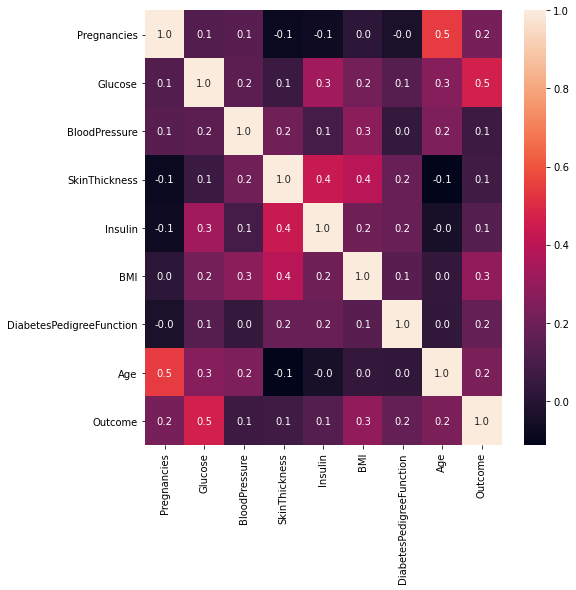

In [37]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,fmt='.1f',annot=True)

In [18]:
# Checking how many samples we have for non-diabetics and for diabetics
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

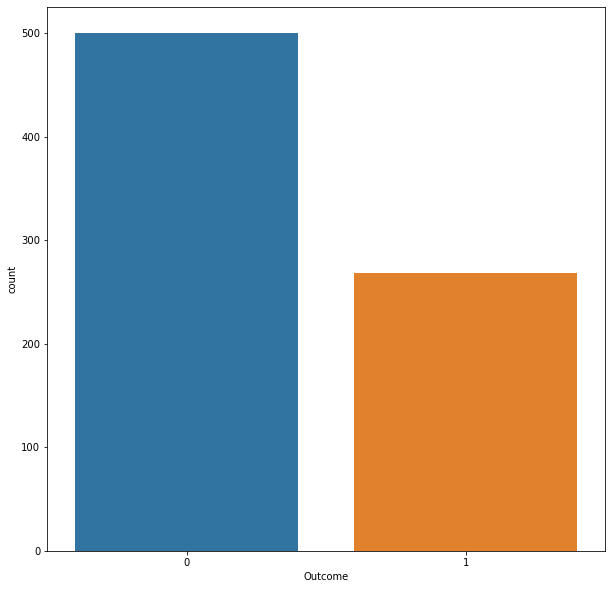

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x="Outcome", data=df)

## Splitting Data for Model Training

In [26]:
# We need to split the data
X = df.drop(['Outcome'],axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = df['Outcome'] # Target.

In [27]:
Scaler = StandardScaler()
StandardizedData = Scaler.fit_transform(X)
print(StandardizedData)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [28]:
# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) 
# 80% data will be used for training the model and rest 20% for testing.

In [43]:
model = LogisticRegression(C=0.3)

In [44]:
# Now we need to train the model
model.fit(X_train,y_train) # fitting means training

LogisticRegression(C=0.3)

In [39]:
X_train.shape

(614, 8)

In [40]:
X_tes

(154, 8)

In [31]:
train_pred = model.predict(X_train)
train_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# Now let's check accuracy score on training data
Training_score = accuracy_score(train_pred,y_train)
#(Basically comparing the original y_train and predictions and seeing difference/error)
print("Accuracy Score:",Training_score)

Accuracy Score: 0.7768729641693811


## Model Metrics on Test Data

In [46]:
test_pred = model.predict(X_test)
test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [47]:
# Accuracy Score
Test_score = accuracy_score(test_pred,y_test) 
print("Accuracy Score:",Test_score)

Accuracy Score: 0.7857142857142857


In [42]:
test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [41]:
y_test

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64